In [41]:
library("TSP")
#remember to adjust the Concorde Path to the absolute path of the directory. 
#note that the concorde solver is also inside the subfolder TSP of your concorde solver
concorde_path("~/concorde/TSP")
source("functions.R")


#generating new random instance with 15 points
no <- 15
for (i in  1:no){
        pts  <- data.frame(x=100*runif(i), y=100*runif(i))
        ## create TSP, ATSP and ETSP (2D)
        dataETSP <- ETSP(pts)
}





found: concorde concorde.c concorde.o 


In [42]:
#the list of points with xy coordinates
dataETSP

,x,y
1,23.619895,71.17481
2,31.749848,74.77562
3,1.591451,15.44938
4,97.592241,60.37430
5,19.169883,77.49897
6,63.789846,47.71019
7,90.559122,23.67392
8,51.237220,98.15522
9,73.013168,10.06562
10,3.033581,47.60871


In [43]:
#the distance matrix of the instance 
vertices_mat <- as.matrix(as.TSP(dataETSP))
vertices_mat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.000000,8.891679,59.92142,74.75667,7.732892,46.52111,82.08042,38.60905,78.57499,31.29149,59.67264,71.09583,69.16493,40.03112,13.58750
2,8.891679,0.000000,66.55172,67.39895,12.871370,41.94162,77.90966,30.43621,76.74663,39.53056,51.01281,65.97099,69.01404,31.78915,15.76686
3,59.921419,66.551725,0.00000,105.99245,64.491501,70.06711,89.34702,96.46221,71.62434,32.19165,105.27601,87.75489,55.31130,85.39332,52.03564
4,74.756666,67.398953,105.99245,0.00000,80.270298,36.09684,37.36820,59.80122,55.99191,95.41646,27.75536,25.11729,64.57437,36.76833,67.71652
5,7.732892,12.871370,64.49150,80.27030,0.000000,53.64991,89.40671,38.14439,86.29227,33.96775,63.13793,78.06844,76.85193,44.48473,21.27633
6,46.521111,41.941618,70.06711,36.09684,53.649912,0.00000,35.97689,51.98336,38.75800,60.75635,40.04742,24.68848,37.96391,26.52054,35.77070
7,82.080419,77.909658,89.34702,37.36820,89.406712,35.97689,0.00000,84.22396,22.20464,90.73916,60.29158,14.78528,36.38570,57.32545,70.26683
8,38.609050,30.436214,96.46221,59.80122,38.144389,51.98336,84.22396,0.00000,90.74122,69.84654,34.16748,69.80578,87.90427,26.90090,44.49304
9,78.574987,76.746632,71.62434,55.99191,86.292273,38.75800,22.20464,90.74122,0.00000,79.41427,73.84748,30.87540,16.34344,64.86025,65.31527
10,31.291491,39.530557,32.19165,95.41646,33.967750,60.75635,90.73916,69.84654,79.41427,0.00000,86.71450,83.96624,65.27101,66.09844,29.21670


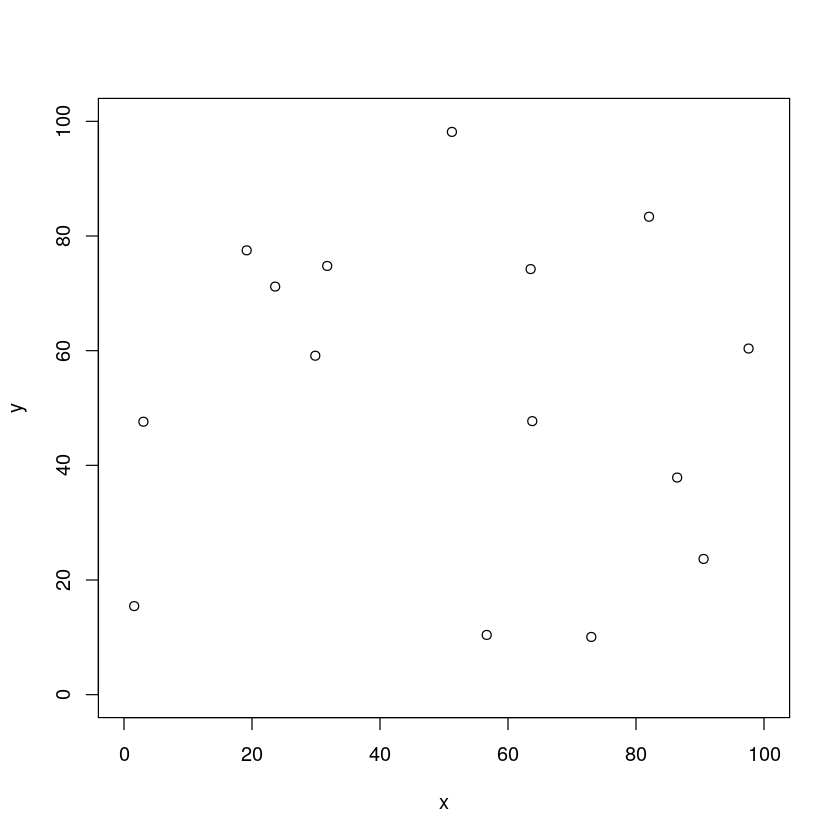

In [44]:
#the plot of the TSP instance
plot(dataETSP, xlim=c(0,100),ylim=c(0,100))

Used control parameters:
clo	 =  
exe	 =  /home/LC/mailo01/concorde/TSP/concorde
precision	 =  6
verbose	 =  TRUE
keep_files	 =  FALSE
[1] "processing time"


Time difference of 0.09373498 secs

[1] "tour_length"


[1] 370.7538

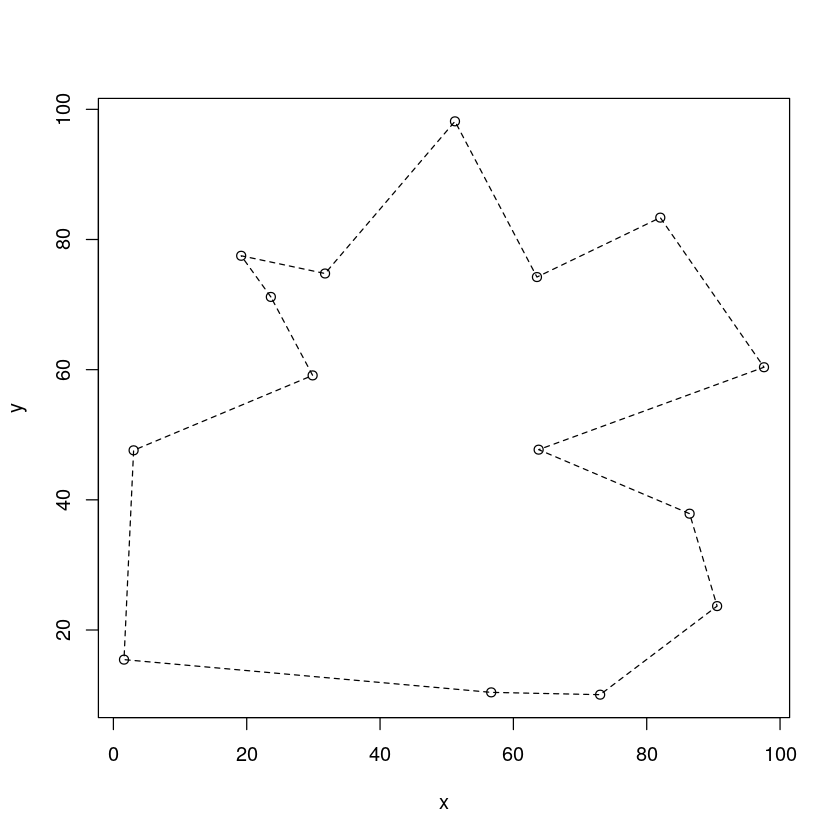

In [45]:
#Concorde Solver with the optimal solution
start_time <- Sys.time()
dataTSP <- as.TSP(dataETSP)
concorde_tour<- solve_TSP(dataTSP, method="concorde")
end_time <- Sys.time()
concorde_time <- end_time - start_time
concorde_result <- tour_length(concorde_tour,dataETSP)

print("processing time")
concorde_time
print("tour_length")
concorde_result

plot(dataETSP, concorde_tour)

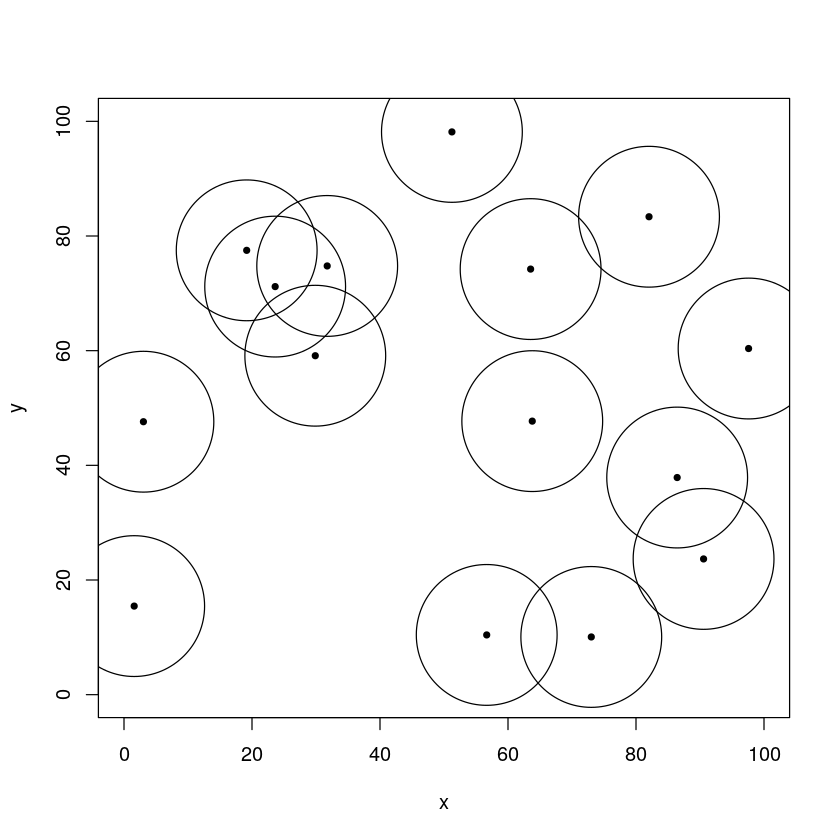

In [46]:
library("hash")
library("sets")

pointSet <- hash()
noPts <- length(dataETSP)/2
horizontal_based <- list()
vertical_based <-list()

#visualization of neighborhoods
radius <- 11
plot(dataETSP,xlim=c(0,100), ylim=c(0,100), pch=20)
symbols(dataETSP, circles=rep(radius,noPts), add=T, inches=F)

In [47]:
#main program

#terminology:
#neighborhood = cluster = branch
#current_tree = "the set of all neighborhoods" (a list of lists)

print("preparing necessary data")
start_time <- Sys.time()
for (i in 1:noPts){
    pointSet[[toString(i)]] <- tuple(dataETSP[i], dataETSP[i+noPts])
    element <- list(i, dataETSP[[i]],dataETSP[[i+noPts]])
    horizontal_based <- append( horizontal_based, list(element))
    vertical_based <- append(vertical_based, list(element))
}
#sorting the points in term of x and y axis. This step speeds up the process of identifying neighbors by only checking the candidates in the box instead of every points possible.
#the box is a 2*r by 2*r square that has the center at the point we are considering. 
horizontal_based <- horizontal_based[order(sapply(horizontal_based, '[[', 2))]
vertical_based <- vertical_based[order(sapply(vertical_based,'[[',3))]
vertices_mat <- as.matrix(as.TSP(dataETSP))
checklist <-(c(1:noPts))
end_time <-Sys.time()
print("total time to pre process data")
add<- end_time - start_time
total<-  add
print(add)

#identify neighborhoods
print("begin identifying neighborhoods based on given radius")
start_time <- Sys.time()
current_tree <- identify_neighborhood(checklist, pointSet,horizontal_based, vertical_based)
end_time <- Sys.time()

print("finished finding neighborhoods. Total processing time: ")
add<- end_time - start_time
total<- total + add
print(add)

#Concorde Solver will not solve instance with 2 points. Needs implementation for 2pt scenario
branch_no <- length(current_tree)
print("total number of neighborhood")
print(branch_no)
if (branch_no <= 2){
    print("number of neighborhoods smaller or equal 2. Concorde Solver will halt")
    cont <- FALSE
} else {
    print("generating neighborhoods' TSP instance")
    print("this step needs improvement since it usually takes 90+% of processing time")
    start_time <- Sys.time()
    cluster_mat <- matrix(rep(0,branch_no^2),nrow=branch_no)

    #generating distance matrix and storing information of endpoints in each neighborhood
    connections <- hash()

    for (branch_index in 1:branch_no){
        #other branches to be compared to
            for (branch_compare_ind in 1:length(current_tree)){
                if (has.key(sprintf("%s-%s",branch_index,branch_compare_ind),connections) == FALSE){

                if (branch_index != branch_compare_ind){
                    minimum_dist <- Inf
                    connect_pts <- NULL

                    for (vertex in current_tree[[branch_index]]){
                        
                        for (vertex_compare in current_tree[[branch_compare_ind]]){
                            if (minimum_dist == Inf){
                                minimum_dist <- vertices_mat[vertex, vertex_compare]
                                connect_pts <- list(vertex, vertex_compare)
                            } else{
                                distance <- vertices_mat[vertex, vertex_compare]
                                if (distance <= minimum_dist){
                                    minimum_dist <- distance
                                    connect_pts <- list(vertex, vertex_compare)
                                } 
                            }
                        } 
                    }

                    connections[[sprintf("%s-%s",branch_index,branch_compare_ind)]] <-  tuple(connect_pts[[1]],connect_pts[[2]])
                    connections[[sprintf("%s-%s",branch_compare_ind,branch_index)]] <-  tuple(connect_pts[[2]],connect_pts[[1]])
                    #append distances to matrix
                    cluster_mat[branch_index,branch_compare_ind] <- minimum_dist
                    cluster_mat[branch_compare_ind,branch_index] <- minimum_dist


                }
            }
        }
    }
    
    
    tsp_cluster <- as.TSP(cluster_mat)
    end_time <- Sys.time()
    
    print("neighborhoods' TSP generated. Total processing time")
    add<- end_time - start_time
    total<- total + add
    print(add)
    
    #solving neighborhood tour
    print("solving the neighborhood's TSP")
    start_time <- Sys.time()
    cluster_tour <- solve_TSP(tsp_cluster, method="concorde")
    end_time <- Sys.time()
    print("solved. Total processing time")
    add<- end_time - start_time
    total<- total + add
    print(add)
    
    #choosing non conflicting end points
    print("choosing suitable endpoints")
    start_time <- Sys.time()
    end_points_list<- end_points_det(cluster_tour, connections)
    end_time <- Sys.time()
    print("determined. total processing time")
    add<- end_time - start_time
    total<- total + add
    print(add)
    
    # solving tour for each neighborhood with corresponding end points
    print("solving for each neighborhood's tour")
    start_time <- Sys.time()

    all_solutions <- list()
    for (branchNo in 1:length(current_tree)){
        print("subcase")
        print(branchNo)
        pts  <- data.frame(x=c(), y=c())
        if ( length(current_tree[[branchNo]]) <=2){
            print("trivial. number of points smaller or equal 2")
            if (length(current_tree[[branchNo]]) == 1){

                all_solutions <- append(all_solutions, list(list(1)))
            }

            if (length(current_tree[[branchNo]]) == 2){
                all_solutions <- append(all_solutions, list(list(2,1)))
            }

        }else{
            
            end_points <- end_points_list[[toString(branchNo)]]
            end_points_pos <-list()
            
            print("generating TSP instance for sub case")
            for (pt in current_tree[[branchNo]]){
                if (pt %in% end_points){
                    end_points_pos <- append(end_points_pos, match(pt,current_tree[[branchNo]] ))
                }
                pt_data <- values(pointSet, keys=pt)
                pts <- rbind(pts, c(pt_data[[1]],pt_data[2]))           

            }
            tsp_subcase <- TSP(dist(pts))
            end_points <- end_points_list[[toString(branchNo)]]
            
            
            tsp_subcase <- add_end_points(tsp_subcase, end_points_pos)

            
            print("using concorde solver.")
            cont <- TRUE
            while (cont == TRUE){
                tour <-  solve_TSP(tsp_subcase)
                if (tour_length(tour, tsp_subcase) != Inf){
                    cont <- FALSE
                }
            }
            print("done. append the current solution")

            all_solutions <- append(all_solutions, list(as.list(as.integer(tour))))
        }
    }
    end_time <- Sys.time()
    print("all individual neighborhood's tour are solved. Total processing time")
    add<- end_time - start_time
    total<- total + add
    print(add)
    
    #merging tours in each neighborhoods according to neighborhood tour
    print("merging") 
    start_time <- Sys.time()
    to_global_subtours <- to_global(all_solutions, current_tree)
    all_subtours <- filter_before_merge(to_global_subtours,end_points_list)
    merged_tour <-merge_all(all_subtours, cluster_tour)
    end_time <- Sys.time()
    add<- end_time - start_time
    total<- total + add
    print(add)
    print("process ends. Total time")
    print(total)
}



[1] "preparing necessary data"
[1] "total time to pre process data"
Time difference of 0.02335978 secs
[1] "begin clustering vertices based on given radius"
[1] "finished clustering. Total processing time: "
Time difference of 0.04680538 secs
[1] "number of branches in tree"
[1] 9
[1] "generating new tsp instances"
[1] "cluster TSP generated. Total processing time"
Time difference of 0.03712106 secs
[1] "solving the cluster-based TSP"
Used control parameters:
clo	 =  
exe	 =  /home/LC/mailo01/concorde/TSP/concorde
precision	 =  6
verbose	 =  TRUE
keep_files	 =  FALSE


Warning message in .prepare_dist_concorde(x, MAX, control$precision):
“Concorde/Linken can only handle distances represented as integers. Converting the provided distances to integers with precison 2. This may lead to rounding errors.”


[1] "cluster tour solved. Total processing time"
Time difference of 0.02606058 secs
[1] " computing suitable endpoints"
[1] "end points determined. total processing time"
Time difference of 0.003418684 secs
[1] "solving for ALL sub cases"
[1] "subcase"
[1] 1
[1] "generating TSP instance for sub case"


Warning message in matrix(const, ncol = p + n, nrow = n, dimnames = list(label, :
“data length [4] is not a sub-multiple or multiple of the number of columns [5]”


[1] "using concorde solver."
[1] "done. append the current solution"
[1] "subcase"
[1] 2
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 3
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 4
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 5
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 6
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 7
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 8
[1] "trivial. number of points smaller or equal 2"
[1] "subcase"
[1] 9
[1] "trivial. number of points smaller or equal 2"
[1] "all subcases are solved. Total processing time"
Time difference of 0.08552074 secs
[1] "merging"
 [1] 15  1  5  2  8 11 14  6  4 12  7  9 13  3 10
Time difference of 0.0008683205 secs
[1] "process ends. Total time"
Time difference of 0.2231545 secs


[1] "evaluation of result: "
[1] "the ratio of this heuristics result over concorde result is: "


[1] 1.017426

[1] "the absolute value of the difference between 2 results"


[1] 6.460583

[1] "the time it takes for the heuristic method is "


Time difference of 0.2231545 secs

[1] "the time it takes for the concorde solver is "


Time difference of 0.09373498 secs

[1] "this is the plot of the heuristic produced tour: "


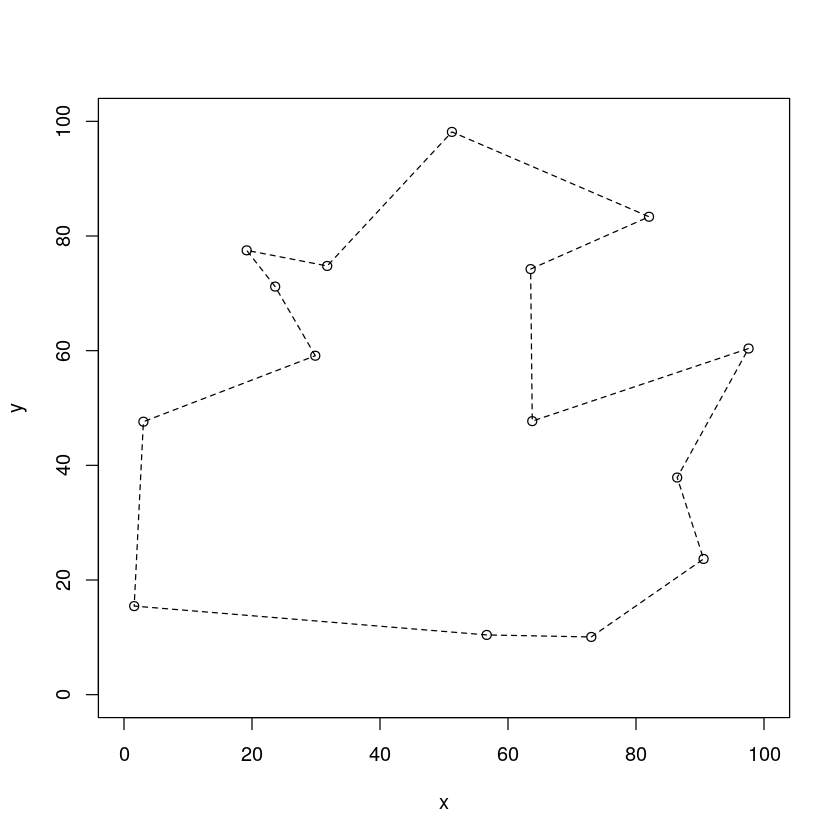

In [48]:
print("evaluation of result: ")
print("the ratio of this heuristics result over concorde result is: ")
tour_length(as.TOUR(merged_tour),dataETSP)/concorde_result

print("the absolute value of the difference between 2 results")
tour_length(as.TOUR(merged_tour),dataETSP) - concorde_result

print("the time it takes for the heuristic method is ")
total
print("the time it takes for the concorde solver is ")
concorde_time

print("this is the plot of the heuristic produced tour: ")
plot(dataETSP, as.TOUR(merged_tour),xlim=c(0,100), ylim=c(0,100))


In [38]:
cluster_tour

object of class ‘TOUR’ 
result of method ‘concorde’ for 5 cities
tour length: 157.6147

In [39]:
current_tree

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 13

[[1]][[3]]
[1] 15

[[1]][[4]]
[1] 14

[[1]][[5]]
[1] 8

[[1]][[6]]
[1] 12

[[1]][[7]]
[1] 3


[[2]]
[[2]][[1]]
[1] 2


[[3]]
[[3]][[1]]
[1] 4

[[3]][[2]]
[1] 11

[[3]][[3]]
[1] 9

[[3]][[4]]
[1] 6


[[4]]
[[4]][[1]]
[1] 5

[[4]][[2]]
[1] 7


[[5]]
[[5]][[1]]
[1] 10